<a href="https://colab.research.google.com/github/andreavazquezt/ProyectoIntegrador/blob/main/Avance2_Equipo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

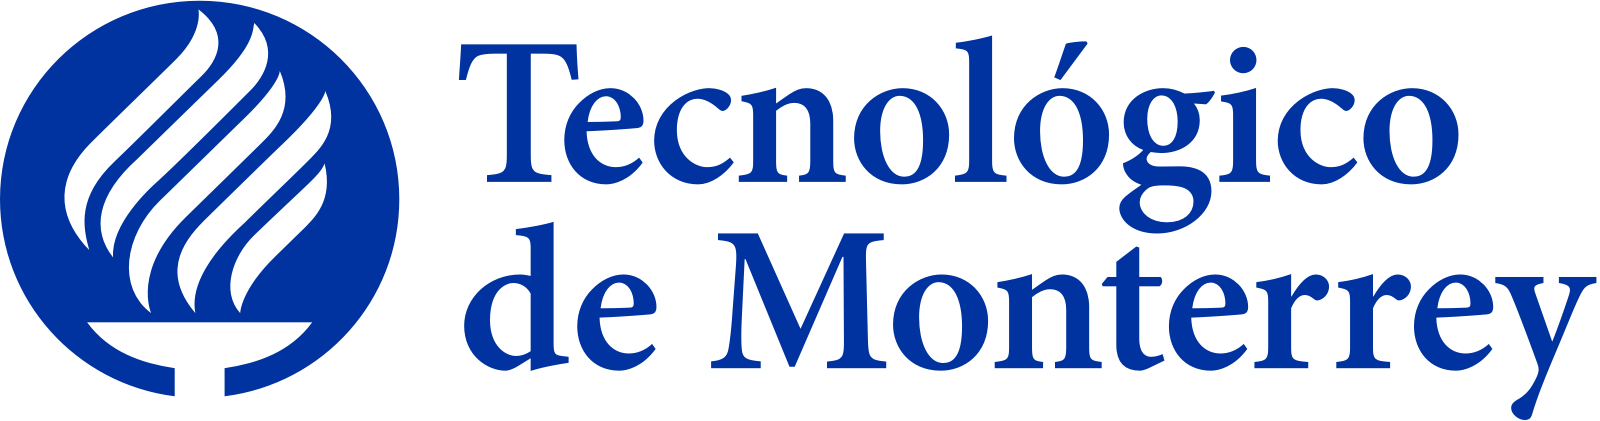

**Andrea Vazquez Tadeo A01730613**

**Hector Manuel Gonzalez Villareal A00178679**

**Karina Zafra Vallejo A01793979**

# Construcción

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats as sts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Leemos el dataset:

In [72]:
df = pd.read_csv("/content/drive/MyDrive/world_population.csv")

Localizamos los valores faltantes del dataset para poder ajustarlos y no tener ningun tipo de error para el entrenamiento y prueba de los modelos:

In [73]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

Utilizamos el método de interpolación lineal para interpolar los valores faltantes del dataset debido a que es una técnica comúnmente utilizada y de facil implementacion para estimar valores intermedios dentro de un conjunto de datos. La justificación detrás de este método radica en la suposición de que los datos tienen un comportamiento lineal entre puntos conocidos.

In [74]:
dforiginal = df.interpolate(method ='linear', limit_direction ='forward')
dforiginal

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,21335741.0,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


Comprobamos que no hay valores faltantes dentro de nuestro dataset y asi poder continuar con el entrenamiento del dataset:

In [75]:
dforiginal.isnull()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Separamos el dataset en **entrenamiento** y **prueba** dataframes para asi poder entrenar nuestro modelo (al tomar valores del conjunto de entrenamiento) y probarlo (comparando las  predicciones del modelo con los valores del conjunto de prueba), utilizando las primeras 180 filas para el entrenamiento y las filas restantes para prueba:

In [76]:
dforiginal = dforiginal.sample(frac=1, random_state=2)
train_df = dforiginal[:180]
train_df = train_df.reset_index(drop=True)
test_df = dforiginal[180:]
test_df = test_df.reset_index(drop=True)

train_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,177,BLZ,Belize,Belmopan,North America,405272.0,394921.0,359871.0,322106.0,2.404060e+05,182589.0,1.451330e+05,1.209050e+05,22966.0,17.6466,1.0131,0.01
1,150,MKD,North Macedonia,Skopje,Europe,2093599.0,2111072.0,2107962.0,2093828.0,2.037936e+06,2044174.0,1.907023e+06,1.656783e+06,25713.0,81.4218,0.9954,0.03
2,108,BGR,Bulgaria,Sofia,Europe,6781953.0,6979175.0,7309253.0,7592273.0,8.097691e+06,8767778.0,8.980606e+06,8.582950e+06,110879.0,61.1654,0.9849,0.09
3,16,VNM,Vietnam,Hanoi,Asia,98186856.0,96648685.0,92191398.0,87411012.0,7.900114e+07,66912613.0,5.296827e+07,4.192885e+07,331212.0,296.4472,1.0074,1.23
4,84,DOM,Dominican Republic,Santo Domingo,North America,11228821.0,10999664.0,10405832.0,9775755.0,8.540791e+06,7129004.0,5.755800e+06,4.475871e+06,48671.0,230.7087,1.0100,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,103,LAO,Laos,Vientiane,Asia,7529475.0,7319399.0,6787419.0,6323418.0,5.430853e+06,4314443.0,3.297519e+06,2.675283e+06,236800.0,31.7968,1.0141,0.09
176,66,KAZ,Kazakhstan,Nursultan,Asia,19397998.0,18979243.0,17835909.0,16627837.0,1.523625e+07,16866563.0,1.417271e+07,1.226530e+07,2724900.0,7.1188,1.0105,0.24
177,131,GEO,Georgia,Tbilisi,Asia,3744385.0,3765912.0,3771132.0,54787095.0,5.479210e+07,53241140.0,5.210749e+07,5.239545e+07,69700.0,53.7214,0.9964,0.05
178,141,LTU,Lithuania,Vilnius,Europe,2750055.0,2820267.0,2963765.0,3139019.0,3.599637e+06,3785847.0,3.521206e+06,3.210147e+06,65300.0,42.1142,0.9869,0.03


Visualizamos el dataframe para la prueba:

In [77]:
test_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,185,NCL,New Caledonia,Nouméa,Oceania,289950.0,286403.0,283032.0,261426.0,2.215370e+05,177264.0,1.485990e+05,1.109820e+05,18575.0,15.6097,1.0075,0.00
1,105,SRB,Serbia,Belgrade,Europe,7221365.0,7358005.0,7519496.0,7653748.0,7.935022e+06,7987529.0,7.777010e+06,7.193533e+06,88361.0,81.7257,0.9897,0.09
2,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,21335741.0,13792086.0,9.891136e+06,7686401.0,5.720438e+06,4.281671e+06,752612.0,26.5976,1.0280,0.25
3,199,VCT,Saint Vincent and the Grenadines,Kingstown,North America,103948.0,104632.0,106482.0,109308.0,1.138130e+05,112487.0,1.074800e+05,9.845900e+04,389.0,267.2185,0.9963,0.00
4,169,MNE,Montenegro,Podgorica,Europe,627082.0,629048.0,633966.0,631044.0,6.333240e+05,621442.0,5.893240e+05,5.302680e+05,13812.0,45.4012,0.9988,0.01
5,211,KNA,Saint Kitts and Nevis,Basseterre,North America,47657.0,47642.0,47790.0,47403.0,4.546100e+04,40636.0,4.309700e+04,4.496800e+04,261.0,182.5939,1.0011,0.00
6,69,TCD,Chad,N'Djamena,Africa,17723315.0,16644701.0,14140274.0,11894727.0,8.259137e+06,5827069.0,4.408230e+06,3.667394e+06,1284000.0,13.8032,1.0316,0.22
7,158,CYP,Cyprus,Nicosia,Europe,1251488.0,1237537.0,1187280.0,1129686.0,9.482370e+05,788500.0,6.793270e+05,6.408040e+05,9251.0,135.2814,1.0059,0.02
8,38,UKR,Ukraine,Kiev,Europe,39701739.0,43909666.0,44982564.0,45683020.0,4.887976e+07,51589817.0,4.997392e+07,4.727909e+07,603500.0,65.7858,0.9120,0.50
9,194,FSM,Micronesia,Palikir,Oceania,114164.0,112106.0,109462.0,107588.0,1.117090e+05,98603.0,7.629900e+04,5.898900e+04,702.0,162.6268,1.0091,0.00


Obtendremos la cantidad de los valores de salida para **entrenamiento** y **prueba** de la columna que el modelo pretende predecir **Growth Rate**:




In [78]:
y_train = train_df['Growth Rate'].to_numpy()
y_test = test_df['Growth Rate'].to_numpy()

y_train.shape, y_test.shape

((180,), (54,))

## Modelo Baseline

Obtenemos el error del modelo baseline que utiliza el promedio de Growth Rate en el dataframe de **entrenamiento**:

In [79]:
average_GrowthRate = train_df['Growth Rate'].mean()
baseline_model_test_predictions = [average_GrowthRate] * len(test_df)

mean_absolute_error(baseline_model_test_predictions, y_test)

0.011216769547325096

De manera general lo que realiza este modelo es calcular el promedio de todos los valores de **Growth Rate** dentro del dataframe de entrenamiento, lo cual nos servira para evaluar los modelos adicionales basados en el promedio del error absoluto.

Como podemos visualizar, obtuvimos un error de 0 y lo podemos comprobar al obtener el promedio para **Growth Rate** y compararlo con el primer valor dentro del dataframe de prueba el cual es de 1.0075 para Oceania.

In [80]:
train_df['Growth Rate'].mean()

1.0095527777777777

## Binning

Generamos el histograma para la columna World Population Percentage del dataframe de **entrenamiento**:

<Axes: >

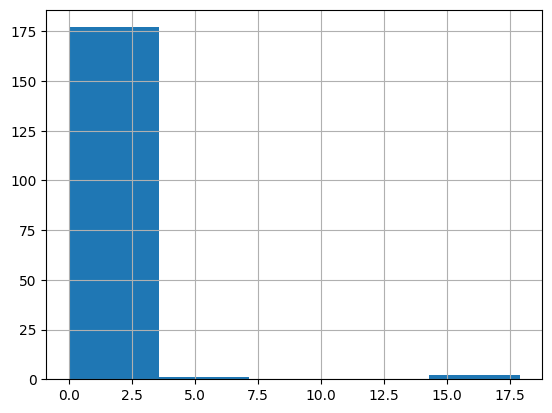

In [81]:
train_df['World Population Percentage'].hist(bins=5)

Como visualizamos el valor con la frecuencia mas alta para la caracteristica (175) es del 0 al 2.5% de la poblacion mundial.

## Codificación (one hot)

A continuacion codificaremos las variables categoricas, para este ejemplo utilizamos la variable categorica **Continent** lo cual nos devuelve por columnas todas las posibles opciones que puede tener, solo devolviendo **true** para la opcion que corresponde cada fila, es decir es una forma de codificar las filas en tipos de cosas:

In [82]:
train_dummies = pd.get_dummies(train_df['Continent'])
train_dummies.head()

,Africa,Asia,Europe,North America,Oceania,South America
0,False,False,False,True,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,True,False,False,False,False
4,False,False,False,True,False,False


Ahora agregaremos la codificacion a nuestro dataframe de entrenamiento:

In [83]:
train_df = pd.concat([train_df, train_dummies], axis=1)
train_df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Africa,Asia,Europe,North America,Oceania,South America
0,177,BLZ,Belize,Belmopan,North America,405272.0,394921.0,359871.0,322106.0,240406.0,...,22966.0,17.6466,1.0131,0.01,False,False,False,True,False,False
1,150,MKD,North Macedonia,Skopje,Europe,2093599.0,2111072.0,2107962.0,2093828.0,2037936.0,...,25713.0,81.4218,0.9954,0.03,False,False,True,False,False,False
2,108,BGR,Bulgaria,Sofia,Europe,6781953.0,6979175.0,7309253.0,7592273.0,8097691.0,...,110879.0,61.1654,0.9849,0.09,False,False,True,False,False,False
3,16,VNM,Vietnam,Hanoi,Asia,98186856.0,96648685.0,92191398.0,87411012.0,79001142.0,...,331212.0,296.4472,1.0074,1.23,False,True,False,False,False,False
4,84,DOM,Dominican Republic,Santo Domingo,North America,11228821.0,10999664.0,10405832.0,9775755.0,8540791.0,...,48671.0,230.7087,1.0100,0.14,False,False,False,True,False,False


Con el siguiente comando somos capaces de identificar la **frecuencia** de cada categoria de la variable presentes en el dataframe de entrenamiento:

In [84]:
train_df['Continent'].value_counts()

Continent
Asia             43
Africa           42
Europe           37
North America    28
Oceania          19
South America    11
Name: count, dtype: int64

Decidimos eliminar la categoria **South America** dentro de la variable **Continent** para propositos del ejercicio debido a que era la categoria con la menor frecuencia dentro del dataframe:

In [85]:
train_df.drop('South America', inplace=True, axis=1)
train_df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Africa,Asia,Europe,North America,Oceania
0,177,BLZ,Belize,Belmopan,North America,405272.0,394921.0,359871.0,322106.0,240406.0,...,120905.0,22966.0,17.6466,1.0131,0.01,False,False,False,True,False
1,150,MKD,North Macedonia,Skopje,Europe,2093599.0,2111072.0,2107962.0,2093828.0,2037936.0,...,1656783.0,25713.0,81.4218,0.9954,0.03,False,False,True,False,False
2,108,BGR,Bulgaria,Sofia,Europe,6781953.0,6979175.0,7309253.0,7592273.0,8097691.0,...,8582950.0,110879.0,61.1654,0.9849,0.09,False,False,True,False,False
3,16,VNM,Vietnam,Hanoi,Asia,98186856.0,96648685.0,92191398.0,87411012.0,79001142.0,...,41928849.0,331212.0,296.4472,1.0074,1.23,False,True,False,False,False
4,84,DOM,Dominican Republic,Santo Domingo,North America,11228821.0,10999664.0,10405832.0,9775755.0,8540791.0,...,4475871.0,48671.0,230.7087,1.0100,0.14,False,False,False,True,False


Comprobamos que dentro de nuestro dataframe ya no se encuentra presente la categoria South America.

Ahora obtendremos la codificacion para el dataframe de prueba para el cual utilizaremos la misma variable categorica **Continent** :

In [86]:
test_dummies = pd.get_dummies(test_df['Continent'])
test_dummies.head()

,Africa,Asia,Europe,North America,Oceania,South America
0,False,False,False,False,True,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,False,True,False,False
4,False,False,True,False,False,False


Eliminamos de igual manera la categoria **South America** dentro de la variable **Continent** y agregamos las columnas restantes de la codificacion al dataframe de prueba:

In [87]:
test_df = pd.concat([test_df, test_dummies], axis=1)
test_df.drop('South America', inplace=True, axis=1)
test_df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Africa,Asia,Europe,North America,Oceania
0,185,NCL,New Caledonia,Nouméa,Oceania,289950.0,286403.0,283032.0,261426.0,221537.0,...,110982.0,18575.0,15.6097,1.0075,0.00,False,False,False,False,True
1,105,SRB,Serbia,Belgrade,Europe,7221365.0,7358005.0,7519496.0,7653748.0,7935022.0,...,7193533.0,88361.0,81.7257,0.9897,0.09,False,False,True,False,False
2,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,21335741.0,13792086.0,9891136.0,...,4281671.0,752612.0,26.5976,1.0280,0.25,True,False,False,False,False
3,199,VCT,Saint Vincent and the Grenadines,Kingstown,North America,103948.0,104632.0,106482.0,109308.0,113813.0,...,98459.0,389.0,267.2185,0.9963,0.00,False,False,False,True,False
4,169,MNE,Montenegro,Podgorica,Europe,627082.0,629048.0,633966.0,631044.0,633324.0,...,530268.0,13812.0,45.4012,0.9988,0.01,False,False,True,False,False


Ahora procederemos a realizar un modelo de regresion linear utilizando solo las categorias generadas de la codificacion:

In [88]:
#Generamos el dataframe de entrenamiento
X_train_dummies = train_df.to_numpy()[:, -4:]
X_train_dummies.shape

(180, 4)

In [89]:
#Generamos el dataframe de prueba
X_test_dummies = test_df.to_numpy()[:, -4:]
X_test_dummies.shape

(54, 4)

In [90]:
#Obtenemos el error para nuestro modelo utilizando las variables generadas a traves de la codificacion
linear_dummy = LinearRegression().fit(X_train_dummies, y_train)
linear_dummy_test_predictions = linear_dummy.predict(X_test_dummies)
mean_absolute_error(y_test, linear_dummy_test_predictions)

0.008560039317262003

## Generación de nuevas características

Con lo anterior podremos ser capaces de dividir los datos en dos bins o de acuerdo a las necesidades del modelo. Para este ejemplo agregaremos una nueva caracteristica al DataFrame de entrenamiento en donde el World Population Percentage sea inferior a 1.5 con valores binarios para indicar si es inferior a 1.5 con 1 y si es mayor al valor obtendremos un 0. Este ejemplo es simulando un escenario en el que los paises con un porcentaje de poblacion mundial superior al 1.5% son irrelevantes para el modelo.

In [91]:
(train_df['World Population Percentage']<1.5)

0      True
1      True
2      True
3      True
4      True
       ... 
175    True
176    True
177    True
178    True
179    True
Name: World Population Percentage, Length: 180, dtype: bool

Como podemos visualizar, el valor entregado es de tipo boolean, pero para efectos de nuestro modelos lo convertiremos a tipo integer con el objetivo de hacer mas eficiente nuestro dataframe.

In [92]:
train_df['World Population Percentage less than 1.5'] = (train_df['World Population Percentage']<1.5).astype(int)
train_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Africa,Asia,Europe,North America,Oceania,World Population Percentage less than 1.5
0,177,BLZ,Belize,Belmopan,North America,405272.0,394921.0,359871.0,322106.0,2.404060e+05,...,22966.0,17.6466,1.0131,0.01,False,False,False,True,False,1
1,150,MKD,North Macedonia,Skopje,Europe,2093599.0,2111072.0,2107962.0,2093828.0,2.037936e+06,...,25713.0,81.4218,0.9954,0.03,False,False,True,False,False,1
2,108,BGR,Bulgaria,Sofia,Europe,6781953.0,6979175.0,7309253.0,7592273.0,8.097691e+06,...,110879.0,61.1654,0.9849,0.09,False,False,True,False,False,1
3,16,VNM,Vietnam,Hanoi,Asia,98186856.0,96648685.0,92191398.0,87411012.0,7.900114e+07,...,331212.0,296.4472,1.0074,1.23,False,True,False,False,False,1
4,84,DOM,Dominican Republic,Santo Domingo,North America,11228821.0,10999664.0,10405832.0,9775755.0,8.540791e+06,...,48671.0,230.7087,1.0100,0.14,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,103,LAO,Laos,Vientiane,Asia,7529475.0,7319399.0,6787419.0,6323418.0,5.430853e+06,...,236800.0,31.7968,1.0141,0.09,False,True,False,False,False,1
176,66,KAZ,Kazakhstan,Nursultan,Asia,19397998.0,18979243.0,17835909.0,16627837.0,1.523625e+07,...,2724900.0,7.1188,1.0105,0.24,False,True,False,False,False,1
177,131,GEO,Georgia,Tbilisi,Asia,3744385.0,3765912.0,3771132.0,54787095.0,5.479210e+07,...,69700.0,53.7214,0.9964,0.05,False,True,False,False,False,1
178,141,LTU,Lithuania,Vilnius,Europe,2750055.0,2820267.0,2963765.0,3139019.0,3.599637e+06,...,65300.0,42.1142,0.9869,0.03,False,False,True,False,False,1


La generación de nuevas características es muy importante dentro de la fase de ingenieria de características debido a que nos permite utilizar modelos menos
complejos que son más rapidos de correr y más sencillos de comprender asi como de mantener. Es por esto que la generacion de caracteristicas se realiza en funcion de las necesidades del modelo.

Ahora generaremos el histograma para la columna de Densidad dentro del dataframe de entrenamiento, para asi poder agrupar los datos segun las necesidades de nuestro modelo:

<Axes: >

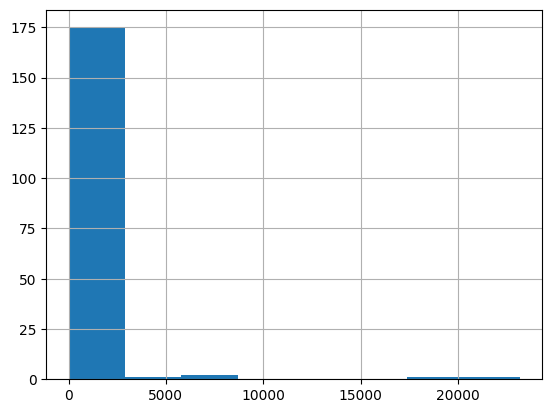

In [93]:
train_df['Density (per km²)'].hist(bins=8)

Para la generacion de la siguiente caracteristica utilizamos el criterio de interes para los paises que cuenten con un valor superior a 500 de densidad. Entregando asi un valor 0 para todos aquellos que no cumplan con el criterio de interes.

In [94]:
train_df['Density greater than 400'] = (train_df['Density (per km²)']>500).astype(int)
train_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Density (per km²),Growth Rate,World Population Percentage,Africa,Asia,Europe,North America,Oceania,World Population Percentage less than 1.5,Density greater than 400
0,177,BLZ,Belize,Belmopan,North America,405272.0,394921.0,359871.0,322106.0,2.404060e+05,...,17.6466,1.0131,0.01,False,False,False,True,False,1,0
1,150,MKD,North Macedonia,Skopje,Europe,2093599.0,2111072.0,2107962.0,2093828.0,2.037936e+06,...,81.4218,0.9954,0.03,False,False,True,False,False,1,0
2,108,BGR,Bulgaria,Sofia,Europe,6781953.0,6979175.0,7309253.0,7592273.0,8.097691e+06,...,61.1654,0.9849,0.09,False,False,True,False,False,1,0
3,16,VNM,Vietnam,Hanoi,Asia,98186856.0,96648685.0,92191398.0,87411012.0,7.900114e+07,...,296.4472,1.0074,1.23,False,True,False,False,False,1,0
4,84,DOM,Dominican Republic,Santo Domingo,North America,11228821.0,10999664.0,10405832.0,9775755.0,8.540791e+06,...,230.7087,1.0100,0.14,False,False,False,True,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,103,LAO,Laos,Vientiane,Asia,7529475.0,7319399.0,6787419.0,6323418.0,5.430853e+06,...,31.7968,1.0141,0.09,False,True,False,False,False,1,0
176,66,KAZ,Kazakhstan,Nursultan,Asia,19397998.0,18979243.0,17835909.0,16627837.0,1.523625e+07,...,7.1188,1.0105,0.24,False,True,False,False,False,1,0
177,131,GEO,Georgia,Tbilisi,Asia,3744385.0,3765912.0,3771132.0,54787095.0,5.479210e+07,...,53.7214,0.9964,0.05,False,True,False,False,False,1,0
178,141,LTU,Lithuania,Vilnius,Europe,2750055.0,2820267.0,2963765.0,3139019.0,3.599637e+06,...,42.1142,0.9869,0.03,False,False,True,False,False,1,0


### Desarrollo de modelo utilizando la nueva caracteristica

A continuación realizaremos la nueva configuración para el modelo solo utilizando la caracteristica (**World Population Percentage less than 1.5**) que generamos:

Ajustamos el dataframe de **entrenamiento** para la nueva variable:

In [95]:
X_train_WorldPopulationPercentage= train_df['World Population Percentage less than 1.5'].to_numpy().reshape(-1, 1)
X_train_WorldPopulationPercentage.shape

(180, 1)

Ajustamos el dataframe de **prueba** para la nueva variable:

In [96]:
test_df['World Population Percentage less than 1.5'] = (test_df['World Population Percentage'] < 1.5).astype(int)
X_test_WorldPopulationPercentage = test_df['World Population Percentage less than 1.5'].to_numpy().reshape(-1, 1)
X_test_WorldPopulationPercentage.shape

(54, 1)

Obtenemos el error del modelo lineal que solo utiliza la **variable binaria generada**:

In [97]:
linear_WorldPopulationPercentage = LinearRegression().fit(X_train_WorldPopulationPercentage, y_train)
linear_WorldPopulationPercentage_test_predictions = linear_WorldPopulationPercentage.predict(X_test_WorldPopulationPercentage)
mean_absolute_error(y_test, linear_WorldPopulationPercentage_test_predictions)

0.011220326797385612

# Normalización

Obtenemos y limpiamos los datos, para este ejemplo usaremos la columna 2010 population

In [98]:

df = dforiginal[['2010 Population']]
df=df.interpolate(method ='linear', limit_direction ='forward')
fd=df.dropna()
df.isnull()

,2010 Population
20,False
152,False
30,False
228,False
54,False
...,...
43,False
22,False
72,False
15,False


## Escalamiento



Normalizamos los datos para que tengamos todas las variables con las mismas dimensiones, en este caso usamos una transformacion de normalizacion, pero pudimos haber utilizado un min max o alguna otra.

In [99]:
datos_normalizados = preprocessing.Normalizer().transform(df.T)
datos_normalizados = datos_normalizados.T
datos2 = pd.DataFrame(datos_normalizados, columns=["2010 Population"])



Graficamos los datos originales y nos damos cuenta que tienes un sesgo altamente positivo

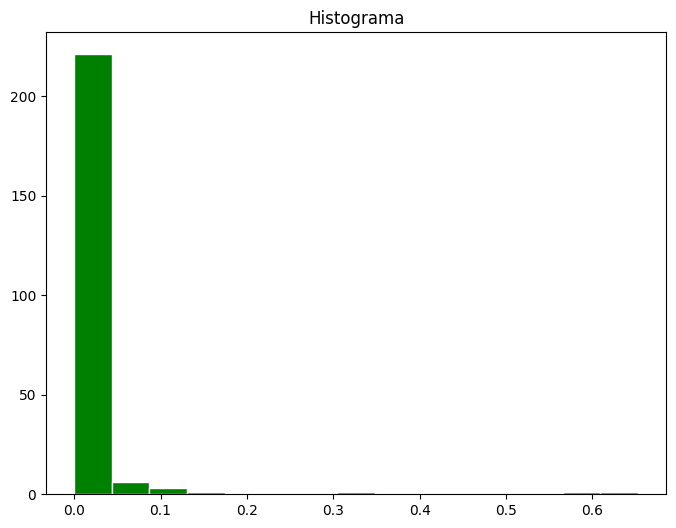

In [100]:
fig, ax=plt.subplots(figsize=(8,6))
ax=plt.hist(datos2['2010 Population'],bins=15,color='g',edgecolor='w')
plt.title('Histograma')
plt.show()

## Transformaciones

Hacemos 4 transformaciones,una de raiz cuadrada, otra exponencial, una logaritmica y otra reciproca. dentro de estas 4 la unica que tiene un buen resultado al normalizar los datos es la logaritimica

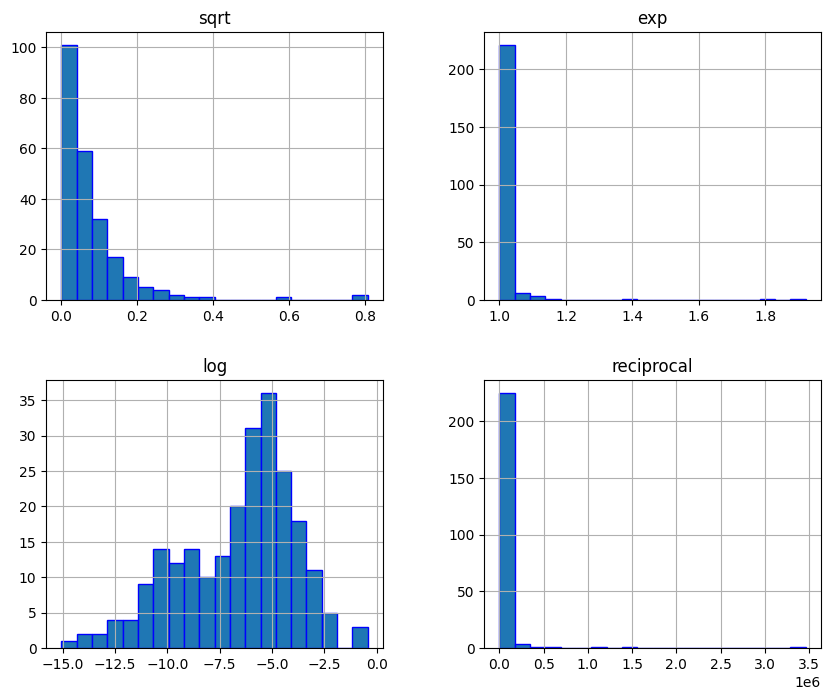

In [101]:
transformaciones = datos2['2010 Population'].transform([np.sqrt,np.exp,np.log,np.reciprocal])
transformaciones.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

El metodo box cox es posible utilizarlo porque solo hay datos positivos y tambien tiene una busna normalziación

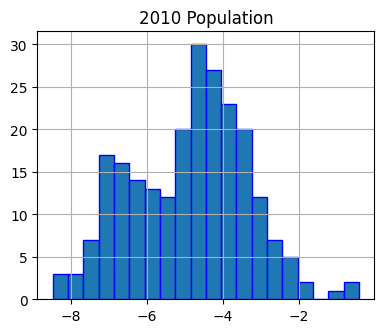

In [102]:
boxcoxdata,lambdas = sts.boxcox(datos2['2010 Population'])
datosbox = pd.DataFrame(boxcoxdata, columns=["2010 Population"])
datosbox.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

El metodos yeo johnson no hace una buena normalizacion en estos datos

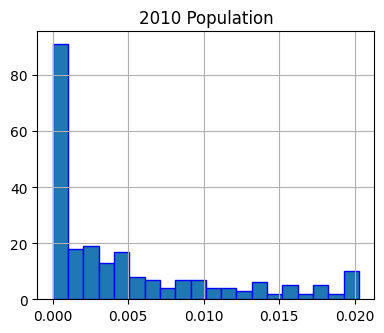

In [103]:
yeodata,lambday = sts.yeojohnson(datos2['2010 Population'])
datosyeo = pd.DataFrame(yeodata, columns=["2010 Population"])
datosyeo.hist(bins=20,layout=(2,2),edgecolor='b',figsize=(10,8))
plt.show()

# Selección / extracción

A continuacion visualizamos la correlacion para las 3 categorias dentro del dataframe de entrenamiento **Growth Rate**, **World Population Percentage**, **Density (per km²)**.

In [104]:
train_df[['Growth Rate', 'World Population Percentage', 'Density (per km²)']].corr()

,Growth Rate,World Population Percentage,Density (per km²)
Growth Rate,1.000000,-0.028944,-0.085362
World Population Percentage,-0.028944,1.000000,-0.032009
Density (per km²),-0.085362,-0.032009,1.000000


Utilizamos la indentificacion en la correlacion de las variables para identificar las variables de interes del modelo en cuestion, es decir cuando nos encontramos con variables altamente correlacionadas, propablemente no es necesario utilizar cada una de ellas. Es por este motivo la importancia de utilizar métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento.

## Análisis de componentes principales (PCA)

Nosotros elegimos PCA para nuestro metodo de filtrado para la selección de características de interes para nuestro modelo. A continuación realizaremos una reduccion dimensional utilizando PCA, para el cual solo utilizaremos las tres caracteristicas utilizadas para nuestra correlación anteriormente. Es decir generaremos dos nuevas matrices, una para **entrenamiento** y otra para **prueba**:

In [105]:
#Entrenamiento
x_train_3 = train_df[['Growth Rate', 'World Population Percentage', 'Density (per km²)']].to_numpy()

x_train_3.shape

(180, 3)

In [106]:
#Prueba
x_test_3 = test_df[['Growth Rate', 'World Population Percentage', 'Density (per km²)']].to_numpy()

x_test_3.shape

(54, 3)

Obtendremos el error para el modelo de regresion de **bosque aleatorio**. Aun cuando el error continua siendo 0 debido al tipo de datos con el cual estamos trabajando actualmente por la falta de datos reales, vemos una mejora comparado con el error obtenido al principio con el **modelo baseline** con un error promedio absoluto de 0.01

In [107]:
forest_base = RandomForestRegressor(n_estimators=50, max_depth=5).fit(x_train_3, y_train)
forest_base_test_predictions = forest_base.predict(x_test_3)
mean_absolute_error(y_test, forest_base_test_predictions)

0.0016652881656701684

Ahora procedemos a entrenar PCA lo cual es basicamente una tecnica de reduccion dimensional con 2 caracteristicas de salida para este ejemplo. Es decir, entregamos las 3 caracteristicas incluidas en la matriz generada anteriormente y deseamos solo 2 caracteristicas de salida, obteniendo asi una informacion mas concisa:

In [108]:
#Entrenamiento de PCA estableciendo 2 caracteristicas de salida
pca = PCA(n_components=2)
pca = pca.fit(x_train_3)

pca

PCA(n_components=2)

Para este ejemplo utilizamos PCA para transformar nuestra matriz de 3 caracteristicas para prueba y entrenamiento en matrices de solo 2 caracteristicas:

In [109]:
#Comprobamos la transformacion
x_train_pca = pca.transform(x_train_3)
x_test_pca = pca.transform(x_test_3)

x_train_pca.shape, x_test_pca.shape

((180, 2), (54, 2))

Volvemos a generar el error para el modelo de regresion de **bosque aleatorio** pero esta vez utilizaremos las matrices transformadas despues de aplicar PCA, buscando asi mejorar el modelo mediante la reduccion dimensional:

In [110]:
forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5).fit(x_train_pca, y_train)
forest_pca_test_predictions = forest_pca.predict(x_test_pca)

mean_absolute_error(y_test, forest_pca_test_predictions)

0.011205405070378283

# Conclusiones

La generación de características implica la creación de nuevas características que pueden mejorar la precisión del modelo. Además de los procesos manuales, hay varios marcos que se pueden utilizar para generar automáticamente nuevas características que expongan el espacio del problema subyacente. Estas características se pueden filtrar posteriormente mediante Selección de características, para asegurarse de que sólo se utiliza un subconjunto de las características más importantes. Este proceso reduce efectivamente la complejidad del modelo y mejora la precisión del modelo, así como la interpretabilidad.